Saving fraudTest.csv.zip to fraudTest.csv.zip
✅ Data Loaded Successfully!
🗂️ Shape: 555719 rows, 23 columns

📌 Columns:
- Unnamed: 0
- trans_date_trans_time
- cc_num
- merchant
- category
- amt
- first
- last
- gender
- street
- city
- state
- zip
- lat
- long
- city_pop
- job
- dob
- trans_num
- unix_time
- merch_lat
- merch_long
- is_fraud

❗ Missing Values:
 - No missing values.

🔍 is_fraud Class Distribution:
is_fraud
0    553574
1      2145
Name: count, dtype: int64


/tmp/ipython-input-1-3265329148.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=fraud_count.values, palette=colors_bar)


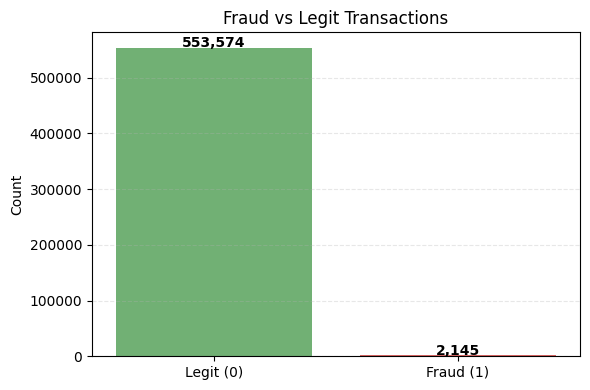

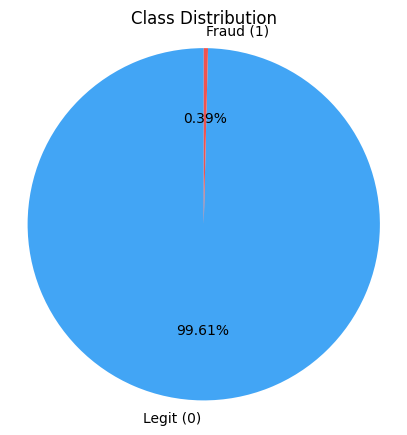

Train shape: (444575, 13)
Test shape: (111144, 13)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


🔍 Logistic Regression Results
[[104664   6051]
 [   114    315]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    110715
           1       0.05      0.73      0.09       429

    accuracy                           0.94    111144
   macro avg       0.52      0.84      0.53    111144
weighted avg       1.00      0.94      0.97    111144

🌲 Random Forest Results
[[110694     21]
 [   146    283]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.93      0.66      0.77       429

    accuracy                           1.00    111144
   macro avg       0.96      0.83      0.89    111144
weighted avg       1.00      1.00      1.00    111144



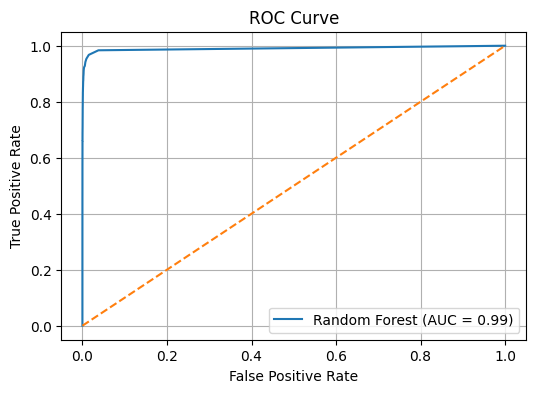

In [1]:
from google.colab import files
import zipfile
import pandas as pd

# Upload ZIP file
uploaded = files.upload()

# Extract ZIP
with zipfile.ZipFile("fraudTest.csv.zip", 'r') as zip_ref:
    zip_ref.extractall()

# Read extracted CSV
df = pd.read_csv("fraudTest.csv")
print("Data Loaded Successfully!")
df.head()

# Shape and Columns
print(f" Shape: {df.shape[0]} rows, {df.shape[1]} columns")

print("\n📌 Columns:")
for col in df.columns:
    print("-", col)

# Missing Values
missing = df.isnull().sum()
missing = missing[missing > 0]

print("\n❗ Missing Values:")
print(missing if not missing.empty else " - No missing values.")

# Class distribution
print("\n is_fraud Class Distribution:")
print(df['is_fraud'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

fraud_count = df['is_fraud'].value_counts().sort_index()
labels = ['Legit (0)', 'Fraud (1)']
colors_bar = ['#66bb6a', '#ef5350']
colors_pie = ['#42a5f5', '#ef5350']

# Bar Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=fraud_count.values, palette=colors_bar)
for i, val in enumerate(fraud_count.values):
    plt.text(i, val + 1000, f'{val:,}', ha='center', fontweight='bold')
plt.title("Fraud vs Legit Transactions")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(5, 5))
plt.pie(fraud_count, labels=labels, colors=colors_pie, autopct='%1.2f%%', startangle=90)
plt.title("Class Distribution")
plt.axis('equal')
plt.show()
# Drop unnecessary columns safely
columns_to_drop = [
    'trans_num', 'trans_date_trans_time', 'first', 'last',
    'dob', 'unix_time', 'merchant', 'cc_num', 'street'
]
df = df.drop([col for col in columns_to_drop if col in df.columns], axis=1)

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['gender', 'category', 'city', 'state', 'job']
le = LabelEncoder()

for col in categorical_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

from sklearn.model_selection import train_test_split

X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print(" Logistic Regression Results")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

from sklearn.metrics import roc_curve, roc_auc_score

y_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_probs)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()
